<a href="https://colab.research.google.com/github/roshantac/EVA4/blob/master/Assignment10/Session10_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install albumentations

In [2]:
########################################
#  Calling  heavenly Gods
########################################
import torch
import torchvision
import torchvision.transforms as transforms
from dataset import *
from model import *
import torch.nn as nn
import torch.nn.functional as F
#from base_functions import *
from traing import *
from torchsummary import summary

# getting the data
trainloader, testloader, testData, classes = getData()



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Utilize GPU if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# Print Model Summary    
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


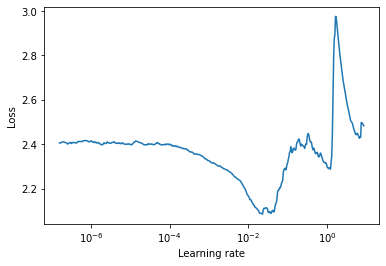

In [4]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=500)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [5]:
# Training starts here
Training(40,model,device, trainloader, testloader )


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.3454984426498413 Batch_id=390 Accuracy=38.67: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.8890, Accuracy: 4895/10000 (48.95%)

EPOCH: 1


Loss=1.092179536819458 Batch_id=390 Accuracy=55.18: 100%|██████████| 391/391 [00:30<00:00, 12.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.8467, Accuracy: 6062/10000 (60.62%)

EPOCH: 2


Loss=0.723346471786499 Batch_id=390 Accuracy=65.62: 100%|██████████| 391/391 [00:29<00:00, 13.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.0748, Accuracy: 7051/10000 (70.51%)

EPOCH: 3


Loss=0.8584281206130981 Batch_id=390 Accuracy=73.18: 100%|██████████| 391/391 [00:29<00:00, 13.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.2844, Accuracy: 7269/10000 (72.69%)

EPOCH: 4


Loss=0.5665988922119141 Batch_id=390 Accuracy=77.93: 100%|██████████| 391/391 [00:29<00:00, 13.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.9382, Accuracy: 7738/10000 (77.38%)

EPOCH: 5


Loss=0.6012040376663208 Batch_id=390 Accuracy=80.76: 100%|██████████| 391/391 [00:29<00:00, 13.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.5015, Accuracy: 7965/10000 (79.65%)

EPOCH: 6


Loss=0.5365988612174988 Batch_id=390 Accuracy=82.97: 100%|██████████| 391/391 [00:29<00:00, 13.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.5425, Accuracy: 8027/10000 (80.27%)

EPOCH: 7


Loss=0.29584208130836487 Batch_id=390 Accuracy=84.98: 100%|██████████| 391/391 [00:29<00:00, 13.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.5107, Accuracy: 8238/10000 (82.38%)

EPOCH: 8


Loss=0.4472326338291168 Batch_id=390 Accuracy=86.49: 100%|██████████| 391/391 [00:29<00:00, 13.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.0719, Accuracy: 8263/10000 (82.63%)

EPOCH: 9


Loss=0.5536036491394043 Batch_id=390 Accuracy=87.83: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.4241, Accuracy: 8420/10000 (84.20%)

EPOCH: 10


Loss=0.14858616888523102 Batch_id=390 Accuracy=89.05: 100%|██████████| 391/391 [00:29<00:00, 13.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.9778, Accuracy: 8345/10000 (83.45%)

EPOCH: 11


Loss=0.17701999843120575 Batch_id=390 Accuracy=89.71: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.8429, Accuracy: 8525/10000 (85.25%)

EPOCH: 12


Loss=0.3203886151313782 Batch_id=390 Accuracy=90.73: 100%|██████████| 391/391 [00:29<00:00, 13.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.5806, Accuracy: 8541/10000 (85.41%)

EPOCH: 13


Loss=0.276006281375885 Batch_id=390 Accuracy=91.46: 100%|██████████| 391/391 [00:29<00:00, 13.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.8942, Accuracy: 8510/10000 (85.10%)

EPOCH: 14


Loss=0.3182360827922821 Batch_id=390 Accuracy=91.89: 100%|██████████| 391/391 [00:29<00:00, 13.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.2440, Accuracy: 8571/10000 (85.71%)

EPOCH: 15


Loss=0.18210874497890472 Batch_id=390 Accuracy=92.73: 100%|██████████| 391/391 [00:29<00:00, 13.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.1134, Accuracy: 8625/10000 (86.25%)

EPOCH: 16


Loss=0.1235809326171875 Batch_id=390 Accuracy=93.19: 100%|██████████| 391/391 [00:29<00:00, 13.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.5519, Accuracy: 8651/10000 (86.51%)

EPOCH: 17


Loss=0.19591432809829712 Batch_id=390 Accuracy=93.51: 100%|██████████| 391/391 [00:29<00:00, 13.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.5087, Accuracy: 8706/10000 (87.06%)

EPOCH: 18


Loss=0.12972715497016907 Batch_id=390 Accuracy=93.88: 100%|██████████| 391/391 [00:29<00:00, 13.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.4416, Accuracy: 8671/10000 (86.71%)

EPOCH: 19


Loss=0.20586152374744415 Batch_id=390 Accuracy=94.12: 100%|██████████| 391/391 [00:29<00:00, 13.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.8826, Accuracy: 8750/10000 (87.50%)

EPOCH: 20


Loss=0.11166368424892426 Batch_id=390 Accuracy=94.53: 100%|██████████| 391/391 [00:29<00:00, 13.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.8227, Accuracy: 8641/10000 (86.41%)

EPOCH: 21


Loss=0.19141323864459991 Batch_id=390 Accuracy=94.81: 100%|██████████| 391/391 [00:29<00:00, 13.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.4962, Accuracy: 8669/10000 (86.69%)

EPOCH: 22


Loss=0.21510934829711914 Batch_id=390 Accuracy=94.88: 100%|██████████| 391/391 [00:29<00:00, 13.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.4177, Accuracy: 8759/10000 (87.59%)

EPOCH: 23


Loss=0.10324883460998535 Batch_id=390 Accuracy=95.07: 100%|██████████| 391/391 [00:29<00:00, 13.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.2137, Accuracy: 8779/10000 (87.79%)

EPOCH: 24


Loss=0.15550097823143005 Batch_id=390 Accuracy=95.31: 100%|██████████| 391/391 [00:29<00:00, 13.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.1518, Accuracy: 8823/10000 (88.23%)

EPOCH: 25


Loss=0.1767653375864029 Batch_id=390 Accuracy=95.36: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.2794, Accuracy: 8731/10000 (87.31%)

EPOCH: 26


Loss=0.19911566376686096 Batch_id=390 Accuracy=95.52: 100%|██████████| 391/391 [00:29<00:00, 13.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9682, Accuracy: 8831/10000 (88.31%)

EPOCH: 27


Loss=0.11993658542633057 Batch_id=390 Accuracy=95.88: 100%|██████████| 391/391 [00:29<00:00, 13.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.5850, Accuracy: 8788/10000 (87.88%)

EPOCH: 28


Loss=0.07617814838886261 Batch_id=390 Accuracy=95.93: 100%|██████████| 391/391 [00:29<00:00, 13.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.4688, Accuracy: 8866/10000 (88.66%)

EPOCH: 29


Loss=0.09644132107496262 Batch_id=390 Accuracy=96.13: 100%|██████████| 391/391 [00:29<00:00, 13.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.8634, Accuracy: 8900/10000 (89.00%)

EPOCH: 30


Loss=0.14628076553344727 Batch_id=390 Accuracy=96.20: 100%|██████████| 391/391 [00:29<00:00, 13.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.8088, Accuracy: 8861/10000 (88.61%)

EPOCH: 31


Loss=0.10745235532522202 Batch_id=390 Accuracy=96.50: 100%|██████████| 391/391 [00:29<00:00, 13.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.2858, Accuracy: 8844/10000 (88.44%)

EPOCH: 32


Loss=0.03748643398284912 Batch_id=390 Accuracy=96.39: 100%|██████████| 391/391 [00:29<00:00, 13.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.9718, Accuracy: 8895/10000 (88.95%)

EPOCH: 33


Loss=0.10991431772708893 Batch_id=390 Accuracy=96.44: 100%|██████████| 391/391 [00:29<00:00, 13.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.4063, Accuracy: 8867/10000 (88.67%)

EPOCH: 34


Loss=0.07549583166837692 Batch_id=390 Accuracy=96.57: 100%|██████████| 391/391 [00:29<00:00, 13.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.3097, Accuracy: 8968/10000 (89.68%)

EPOCH: 35


Loss=0.12553919851779938 Batch_id=390 Accuracy=96.86: 100%|██████████| 391/391 [00:29<00:00, 13.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.9060, Accuracy: 8926/10000 (89.26%)

EPOCH: 36


Loss=0.1266207993030548 Batch_id=390 Accuracy=96.77: 100%|██████████| 391/391 [00:29<00:00, 13.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.6401, Accuracy: 8926/10000 (89.26%)

EPOCH: 37


Loss=0.09532163292169571 Batch_id=390 Accuracy=96.92: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.4566, Accuracy: 8920/10000 (89.20%)

EPOCH: 38


Loss=0.09586925804615021 Batch_id=390 Accuracy=96.90: 100%|██████████| 391/391 [00:29<00:00, 13.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.9987, Accuracy: 8950/10000 (89.50%)

EPOCH: 39


Loss=0.08618490397930145 Batch_id=390 Accuracy=97.03: 100%|██████████| 391/391 [00:29<00:00, 13.29it/s]



Test set: Average loss: -15.3119, Accuracy: 8984/10000 (89.84%)



In [6]:
# Calsswise accuracy 
ClassTestAccuracy(testloader,device,model,classes)

Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 76 %
Accuracy of   cat : 79 %
Accuracy of  deer : 87 %
Accuracy of   dog : 84 %
Accuracy of  frog : 98 %
Accuracy of horse : 90 %
Accuracy of  ship : 95 %
Accuracy of truck : 89 %


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


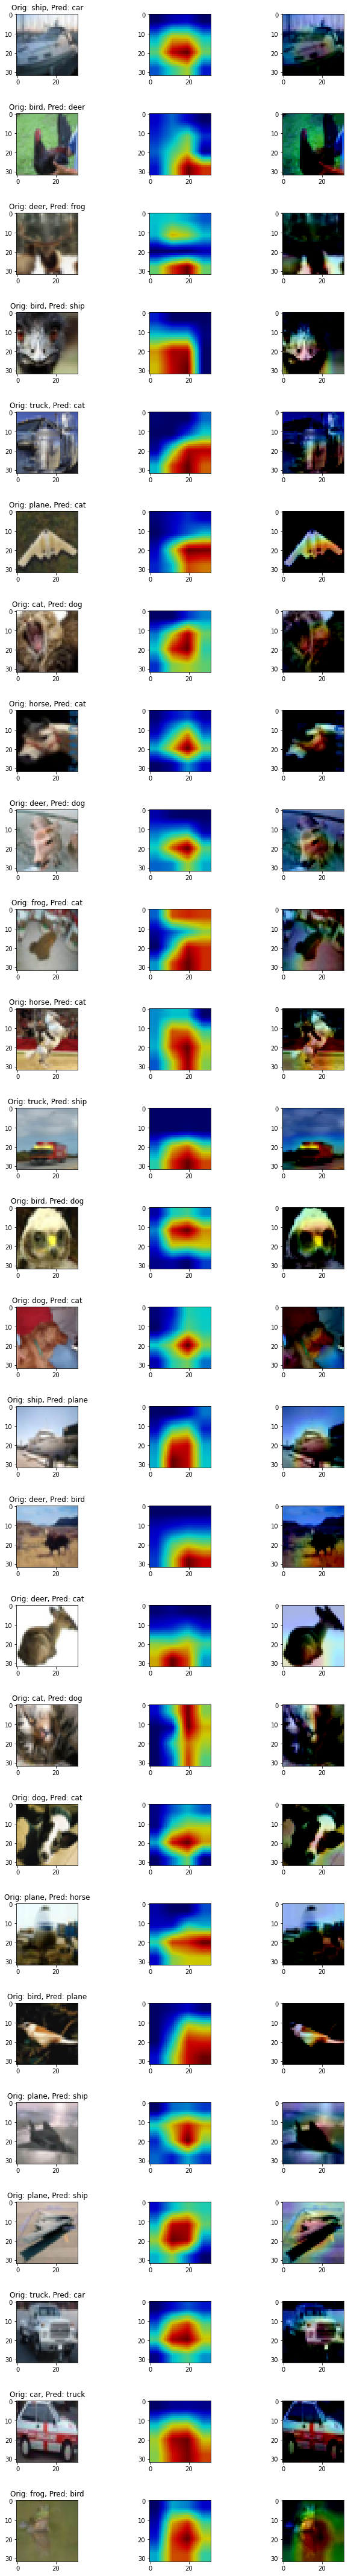

In [7]:

MissClassifedImage(testData,model,device,26,classes)

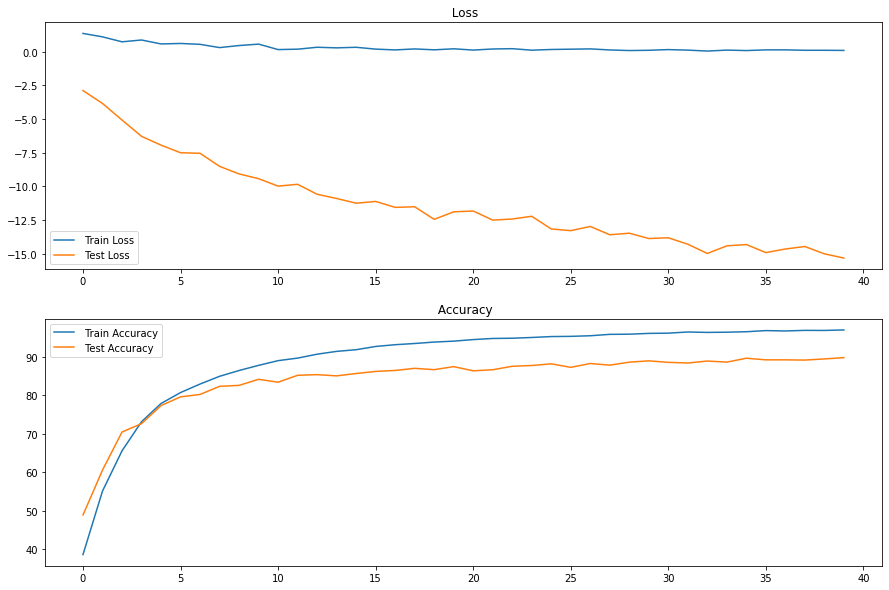

In [8]:
plotPerformanceGraph( )